In [2]:
!pip install seaborn

In [3]:
!pip install matplotlib

In [4]:
!pip install librosa

  Using cached librosa-0.10.0.post2-py3-none-any.whl (253 kB)
  Using cached audioread-3.0.0.tar.gz (377 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl (1.0 MB)
                                              0.0/184.5 kB ? eta -:--:--
     ------                                   30.7/184.5 kB ? eta -:--:--
     ------------                          61.4/184.5 kB 544.7 kB/s eta 0:00:01
     --------------                        71.7/184.5 kB 491.5 kB/s eta 0:00:01
     -----------------------              122.9/184.5 kB 554.9 kB/s eta 0:00:01
     ---------------------------          143.4/184.5 kB 607.9 kB/s eta 0:00:01
     ---------------------------          143.4/184.5 kB 607.9 kB/s eta 0:00:01
     ---------------------------          143.4/184.5 kB 607.9 kB/s eta 0:00:01
     ---------------------------          143.4/184.5 kB 607.9 kB/s eta 0:00:01
     ---------

In [5]:
import IPython

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
# conda update wrapt
# !pip install tensorflow
# import tenserflow 
# import keras
# pip install tensorflow-gpu==1.14
# !pip install keras


In [17]:
paths = []
labels = []
for dirname, _, filenames in os.walk(r'C:\Users\MANJU\Desktop\project\TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [18]:
len(paths)

2800

In [19]:
paths[:5]

['C:\\Users\\MANJU\\Desktop\\project\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\MANJU\\Desktop\\project\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\MANJU\\Desktop\\project\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\MANJU\\Desktop\\project\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\MANJU\\Desktop\\project\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [20]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [30]:
# create a dataFrame
df = pd.DataFrame()
df['paths'] = paths
df['label'] = labels
df.tail(10)

,paths,label
2790,C:\Users\MANJU\Desktop\project\TESS Toronto em...,sad
2791,C:\Users\MANJU\Desktop\project\TESS Toronto em...,sad
2792,C:\Users\MANJU\Desktop\project\TESS Toronto em...,sad
2793,C:\Users\MANJU\Desktop\project\TESS Toronto em...,sad
2794,C:\Users\MANJU\Desktop\project\TESS Toronto em...,sad
2795,C:\Users\MANJU\Desktop\project\TESS Toronto em...,sad
2796,C:\Users\MANJU\Desktop\project\TESS Toronto em...,sad
2797,C:\Users\MANJU\Desktop\project\TESS Toronto em...,sad
2798,C:\Users\MANJU\Desktop\project\TESS Toronto em...,sad
2799,C:\Users\MANJU\Desktop\project\TESS Toronto em...,sad


In [31]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

In [33]:
!pip install seaborn

In [40]:
def convert_column_to_numerical(df, label):
    # Get unique string values from the column
    unique_values = df[label].unique()
    
    # Create a mapping dictionary for string to numerical conversion
    mapping = {value: index for index, value in enumerate(unique_values)}
    
    # Replace string values with numerical representations
    df[label] = df[label].map(mapping)
    
    # Convert the column to a numerical data type
    df[label] = pd.to_numeric(df[label])


In [41]:
# Call the function to convert the 'label' column to numerical
convert_column_to_numerical(df, 'label')



<Axes: ylabel='count'>

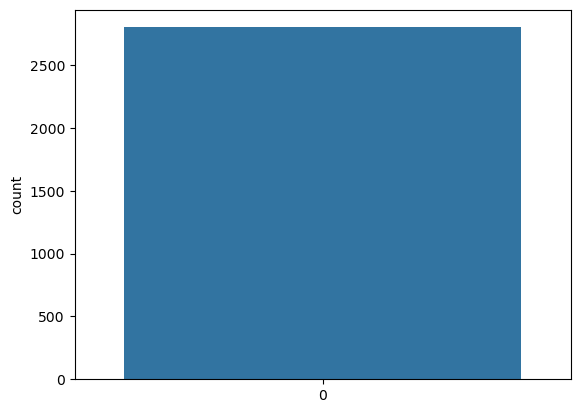

In [42]:
sns.countplot(df['label'])

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

The spectrogram is a visual representation of a spectrum of different frequencies for time

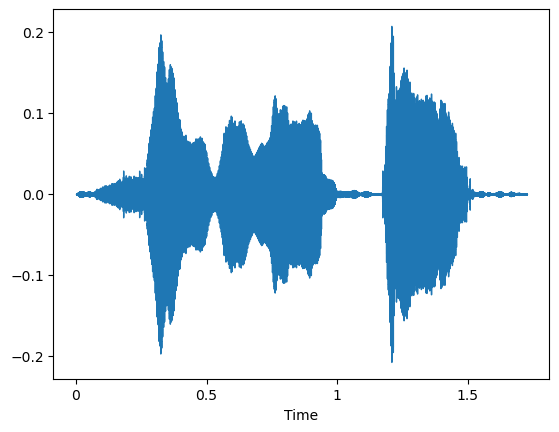

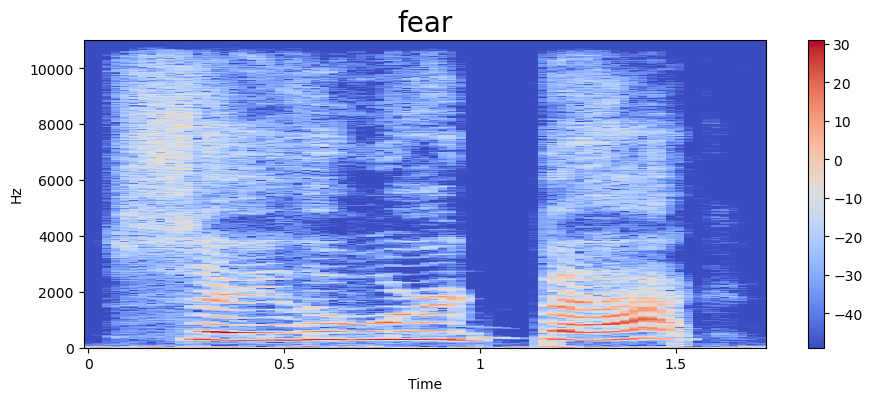

In [10]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
# librosa.display.waveshow(samplig_rate)
spectogram(data,sampling_rate,emotion)
Audio(path).

In [11]:
# X = scipy.fft(x[10000:14096])
# X_mag = numpy.absolute(X)
# plt.figure(figsize=(14, 5))
# plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
# plt.xlabel('Frequency (Hz)')

In [12]:
# emotion = 'fear'
# path = np.array(df['speech'][df['label']==emotion])[0]
# data,sampling_rate = librosa.load(path)
# librosa.display.waveshow(sampling_rate)
# # librosa.display.waveshow(samplig_rate)
# spectogram(data,sampling_rate,emotion)
# Audio(path)

#### What does librosa load do?
###load. Load an audio file as a floating point time series.
###Audio will be automatically resampled to the given rate (default sr=22050 ).

In [13]:
sampling_rate

22050

In [14]:
data.shape

(38084,)

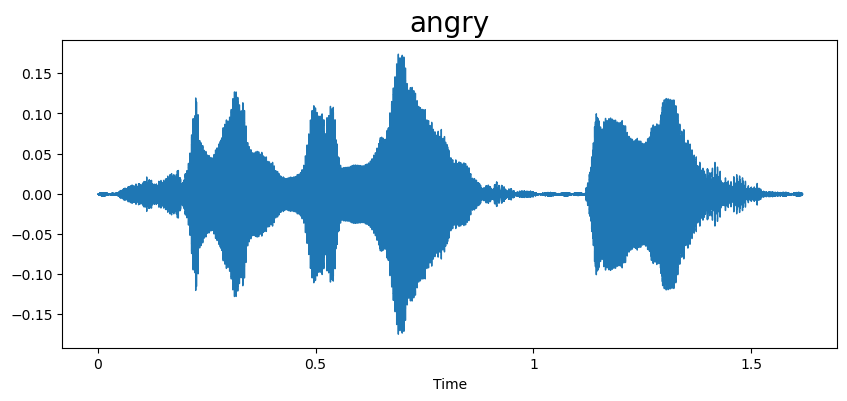

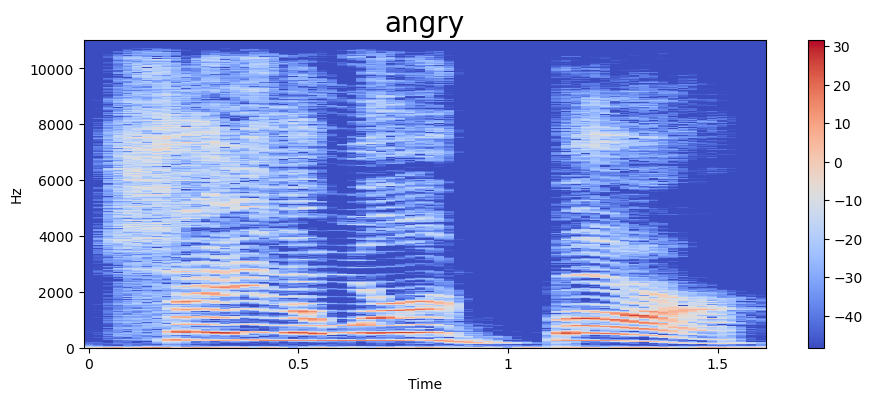

In [15]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

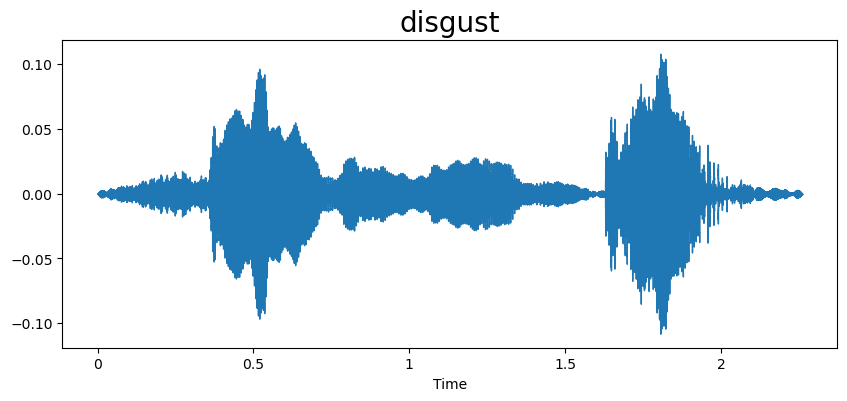

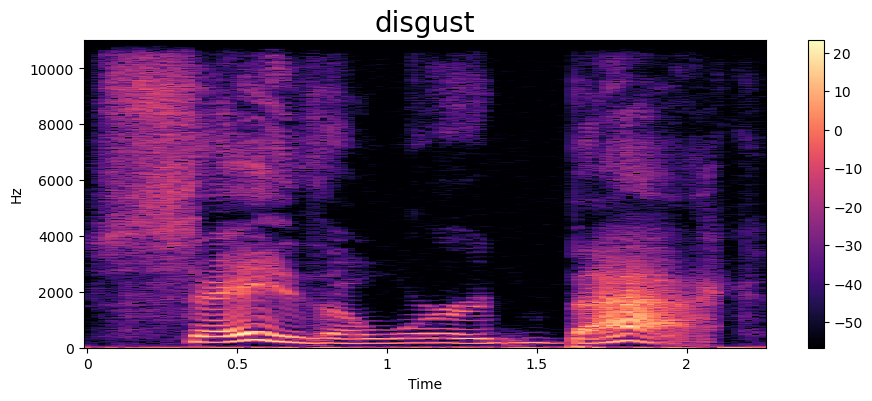

In [16]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

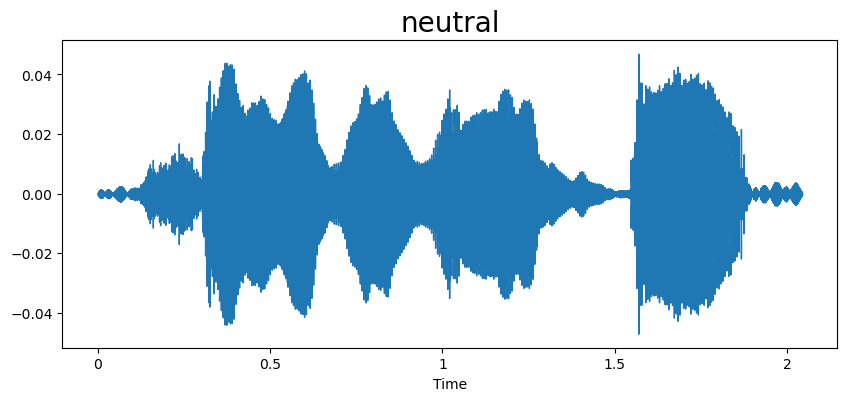

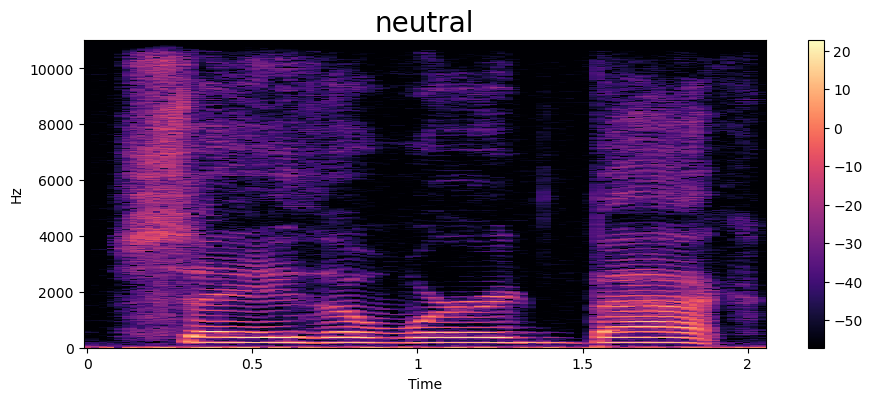

In [17]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

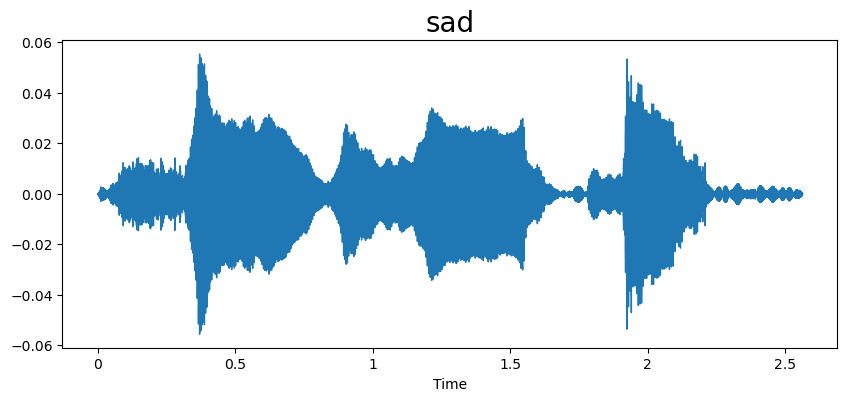

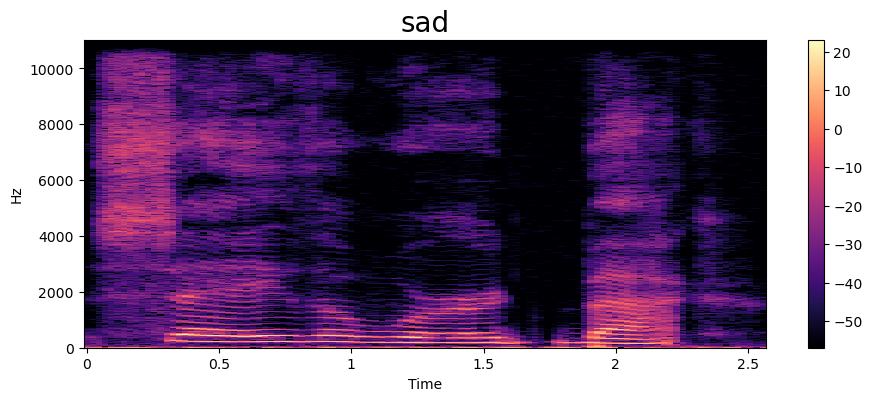

In [18]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

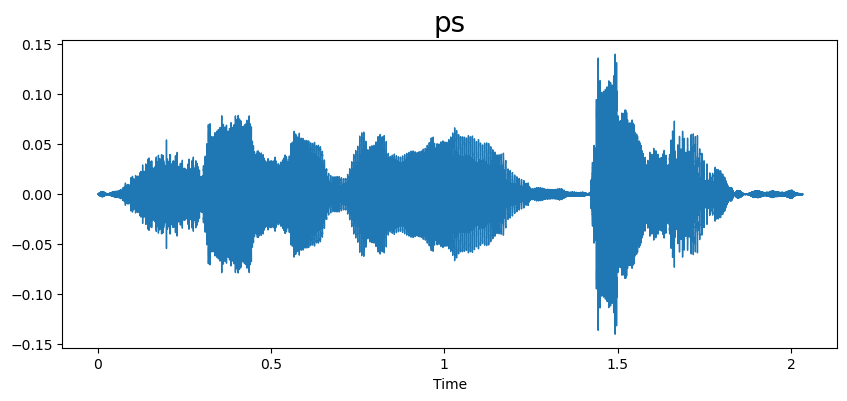

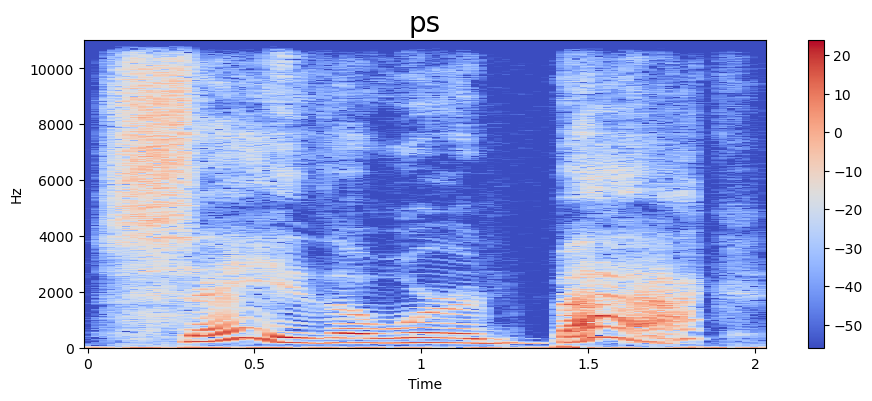

In [19]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
 n  spectogram(data, sampling_rate, emotion)
Audio(path)

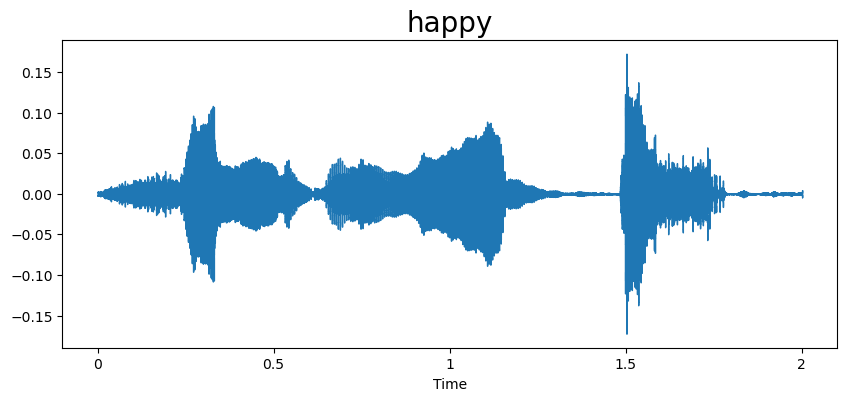

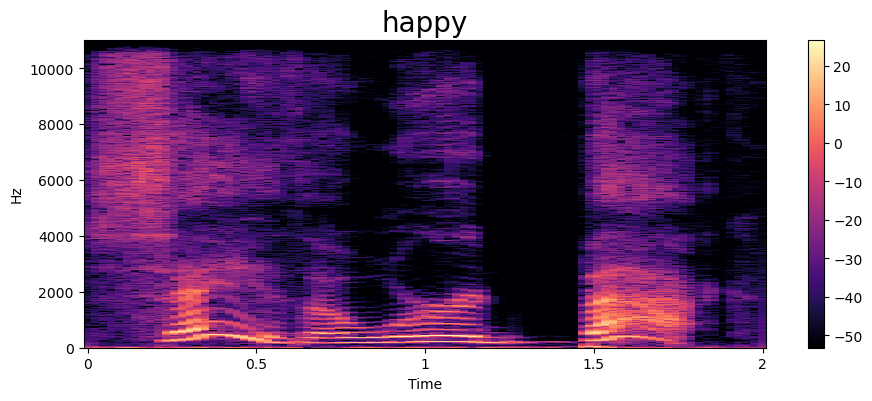

In [20]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [21]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc


In [22]:
22-666


-644

In [23]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27550924e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651104e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722492e-01,  5.11131430e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996375e+00, -1.82390714e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915043e+00, -1.90649128e+00],
      dtype=float32)

In [24]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [25]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600896, -32.74544, ...
2       [-429.79196, 46.124, 1.5550478, -0.21709506, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
2795    [-553.2201, 89.83577, 27.215466, 16.407124, 19...
2796    [-589.23676, 96.20408, 36.96118, 15.014448, 28...
2797    [-533.41815, 85.43242, 27.791998, 19.307178, 2...
2798    [-548.6142, 110.16424, 31.910236, 12.572517, 2...
2799    [-549.2962, 102.374565, 32.268833, 26.261616, ...
Name: speech, Length: 2800, dtype: object

In [26]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [27]:
## input split
X = np.expand_dims(X, -1)
X.shap

(2800, 40, 1)

In [28]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [29]:
y = y.toarray()

In [30]:
y.shape

(2800, 7)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.10, random_state=111)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2520, 40, 1), (280, 40, 1), (2520, 7), (280, 7))

In [34]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Create the LSTM Model

In [35]:
# !pip install keras


In [36]:
# conda update wrapt
# !pip install tensorflow
# pip install tensorflow-gpu==1.14


In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

### Train the model

In [38]:

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=512, shuffle=True) 

Epoch 1/100
4/4 [==============================] - 9s 901ms/step - loss: 1.9276 - accuracy: 0.1870 - val_loss: 1.8074 - val_accuracy: 0.4147
Epoch 2/100
4/4 [==============================] - 2s 398ms/step - loss: 1.7867 - accuracy: 0.3656 - val_loss: 1.6750 - val_accuracy: 0.5516
Epoch 3/100
4/4 [==============================] - 2s 508ms/step - loss: 1.6465 - accuracy: 0.4469 - val_loss: 1.4795 - val_accuracy: 0.5972
Epoch 4/100
4/4 [==============================] - 2s 514ms/step - loss: 1.4875 - accuracy: 0.4747 - val_loss: 1.2604 - val_accuracy: 0.6270
Epoch 5/100
4/4 [==============================] - 2s 524ms/step - loss: 1.3256 - accuracy: 0.4995 - val_loss: 1.0760 - val_accuracy: 0.6845
Epoch 6/100
4/4 [==============================] - 2s 506ms/step - loss: 1.1866 - accuracy: 0.5526 - val_loss: 0.9200 - val_accuracy: 0.7103
Epoch 7/100
4/4 [==============================] - 2s 491ms/step - loss: 1.0756 - accuracy: 0.5813 - val_loss: 0.7859 - val_accuracy: 0.7778
Epoch 8/100
4

In [39]:
import pickle

# Save the LSTM model
model.save('lstm_model.h5')

In [42]:
y_pred=model.predict(X_test)

9/9 [==============================] - 4s 22ms/step


In [52]:
# Convert y_test from one-hot encoding to class labels
y_test = np.argmax(y_test, axis=1)

# Convert y_pred from probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [56]:
y_pred

array([4, 1, 3, 5, 1, 5, 4, 4, 1, 2, 1, 4, 2, 0, 5, 3, 1, 1, 2, 0, 1, 4,
       1, 6, 4, 0, 2, 1, 6, 2, 3, 6, 4, 6, 1, 0, 1, 1, 0, 3, 3, 4, 4, 3,
       6, 3, 2, 0, 1, 2, 1, 2, 3, 6, 2, 6, 6, 5, 6, 6, 2, 3, 4, 0, 0, 1,
       1, 2, 5, 3, 5, 0, 0, 1, 5, 0, 5, 2, 2, 0, 3, 3, 4, 0, 3, 6, 0, 4,
       5, 1, 0, 5, 1, 5, 5, 3, 4, 3, 6, 6, 3, 1, 0, 0, 2, 6, 5, 4, 5, 5,
       1, 3, 4, 0, 6, 5, 4, 1, 5, 6, 6, 5, 4, 4, 1, 0, 1, 3, 5, 3, 0, 3,
       2, 2, 6, 2, 0, 6, 0, 5, 0, 3, 6, 4, 2, 6, 6, 2, 4, 3, 2, 4, 6, 3,
       6, 0, 6, 5, 6, 1, 1, 4, 6, 4, 2, 2, 1, 2, 4, 6, 5, 5, 4, 3, 2, 1,
       0, 2, 3, 5, 4, 5, 4, 3, 5, 5, 0, 0, 3, 2, 2, 6, 1, 4, 4, 0, 0, 5,
       5, 2, 2, 5, 3, 2, 1, 0, 1, 2, 5, 4, 1, 2, 4, 5, 1, 4, 4, 0, 0, 2,
       5, 6, 5, 0, 6, 1, 2, 3, 2, 1, 3, 4, 6, 5, 0, 0, 5, 5, 2, 1, 6, 1,
       3, 4, 1, 4, 4, 5, 0, 0, 1, 0, 0, 1, 4, 4, 3, 5, 2, 6, 3, 6, 2, 1,
       2, 1, 3, 6, 2, 2, 5, 6, 4, 2, 1, 3, 0, 1, 0, 3], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_pred)

0.9892857142857143

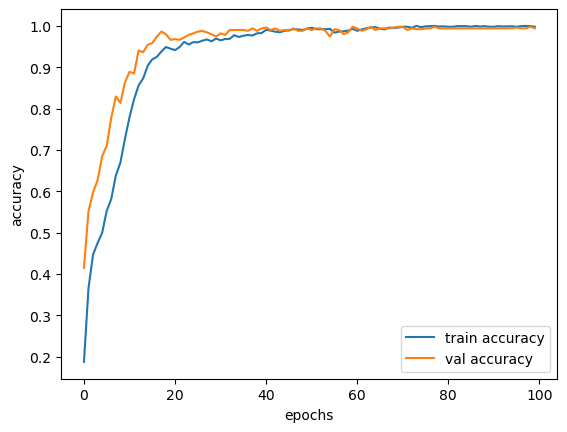

In [59]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

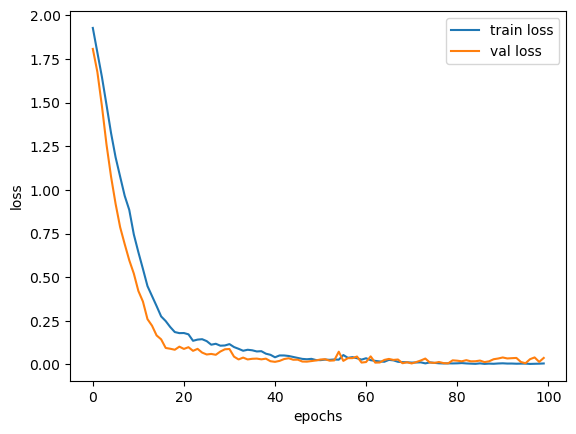

In [60]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [1]:
#========================== new===============================
import speech_recognition as sr
import librosa
import numpy as np
from tensorflow.keras.models import load_model

# Load the speech emotion detection model
model = load_model("lstm_model.h5")

In [40]:
# sr = sr.Recognizer()  # create a speech recognizer object
# sample_rate = 22050
# duration = 5          

# with sr.Microphone() as source:
#     print("Please speak now...")
#     audio = r.record(source, duration=duration)
#     print("Recording complete.")

# # Convert the audio input into a format that can be used by the machine learning model
# audio_data = np.array(audio.get_array_of_samples())
# audio_data = librosa.resample(audio_data, sr, 8000)
# audio_data = audio_data.reshape(1, -1)

In [41]:
# # Convert the audio input into a format that can be used by the machine learning model
# # audio_data = np.array(audio.get_array_of_samples())
# audio_data = np.frombuffer(audio.frame_data, dtype=np.int16)
# sr = audio.sample_rate
# target_sr = 8000
# audio_data = librosa.resample(audio_data, sr, target_sr)
# audio_data = audio_data.reshape(1, -1)

In [42]:
# # Preprocess the audio data before feeding it to the machine learning model for prediction
# processed_data = preprocess(audio_data)

In [43]:
# # Make a prediction using the machine learning model
# prediction = model.predict(processed_data)

In [44]:
# # Print the predicted speech emotion
# emotion_labels = ["neutral", "happy", "angry", "sad"]
# predicted_emotion = emotion_labels[np.argmax(prediction)]
# print("The predicted emotion is:", predicted_emotion)

# #=================end===========================

In [17]:
#RECORDED USING MICROPHONE:
import pyaudio
import wave

CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output10.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")
print(np.array(frames).shape)
stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording
(172,)


In [18]:
import speech_recognition as sr

# initialize the recognizer
r = sr.Recognizer()

# read the audio file
with sr.AudioFile("output10.wav") as source:
    audio_data = r.record(source)

# transcribe the audio to text
text = r.recognize_google(audio_data, language='en-US')

# print the transcribed text
print(text)

result2:
{   'alternative': [   {   'confidence': 0.92995483,
                           'transcript': 'hello welcome please'},
                       {'transcript': 'hello welcome place'},
                       {'transcript': 'hello welcome pleased'},
                       {'transcript': 'hello welcome plz'},
                       {'transcript': 'hello welcome pleas'}],
    'final': True}
hello welcome please


In [19]:
# Load the recorded audio file
filename = "output10.wav"
audio_data, sr =librosa.load(filename, sr=8000, mono=True, duration=5.0)

In [20]:
sample_rate = 22050
duration = 5

In [21]:
# Extract the Mel-frequency cepstral coefficients (MFCCs) from the audio file
mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)

In [22]:
# Pad the MFCCs to a fixed length of 40 frames
if mfccs.shape[1] < 40:
    pad_width = 40 - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
elif mfccs.shape[1] > 40:
    mfccs = mfccs[:, :40]

In [23]:
# Add extra dimension to make a batch of 1
mfccs1 = np.expand_dims(mfccs, axis=2)

In [24]:
mfccs1.shape

(40, 40, 1)

In [25]:
# Make the prediction using the loaded model
prediction = model.predict(mfccs1)

2/2 [==============================] - 0s 9ms/step


In [26]:
# Get the index of the maximum value in the predictions array
max_index = np.argmax(prediction,axis=1)
print(max_index)

[2 5 4 2 2 2 2 2 2 2 2 2 2 2 2 2 0 5 5 5 4 4 2 2 2 2 2 2 2 2 2 6 2 2 0 3 0
 0 3 6]


In [27]:
# # Map the emotion label to the corresponding emotion
# emotion_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}
# predicted_emotion = emotion_dict[max_index[i]]
# print(predicted_emotion)

In [28]:
# Assign the predicted emotion label based on the index
emotion_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
for i in  max_index:
    predicted_emotion = emotion_labels[max_index[i]]
    print("Predicted Emotion: ", predicted_emotion)

Predicted Emotion:  angry
Predicted Emotion:  happy
Predicted Emotion:  happy
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  happy
Predicted Emotion:  happy
Predicted Emotion:  happy
Predicted Emotion:  happy
Predicted Emotion:  happy
Predicted Emotion:  happy
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  happy
Predicted Emotion:  angry
Predicted Emotion:  angry
Predicted Emotion:  happy
Predicted Emotion:  happy
Predicted Emotion:  happy
Predicted Emotion:  happy
Predicted Em

In [29]:
# Print the predicted emotion label
print("Predicted Emotion: ", predicted_emotion)

Predicted Emotion:  happy
